# Problem Statement
- 1.Bank is fancing issue of customers churning.
- 2.Need to find the reasons for the churn using the given data.
- 3.To build classification model to predict churning of customers.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\Bank-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Basic data Exploration

In [53]:
#check number of rows and columns
df.shape

(10000, 18)

In [54]:
#check datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [55]:
#check any null values in the dataframe
df.isnull().sum()
#No null values in the dataframe

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [56]:
#check for duplicated value
df.duplicated().sum()
#No duplicate entries
#data is clean.

0

In [57]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [58]:
#for the analysis,column='RowNumber' and 'Surname' are not necessary.We can drop these columns from the dataframe.
df=df.drop(columns=['RowNumber','Surname'])

In [59]:
#Now lets check for any duplicates in the data after dropping unnecessary columns
df.duplicated().sum()
#No duplicate records in the dataframe

0

In [60]:
#Even we don't need customer id column for the analysis.We drop that also
df=df.drop(columns='CustomerId')
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


# Exploratory Data Analysis

In [61]:
#check categorical and nominal features.
df.nunique()
#features for which the number of unique elements is less than 20 can be considered as categorical variables

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [62]:
df1=df.nunique().reset_index()
cat_var=list(df1[df1[0]<20]['index'])
print(cat_var)

['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']


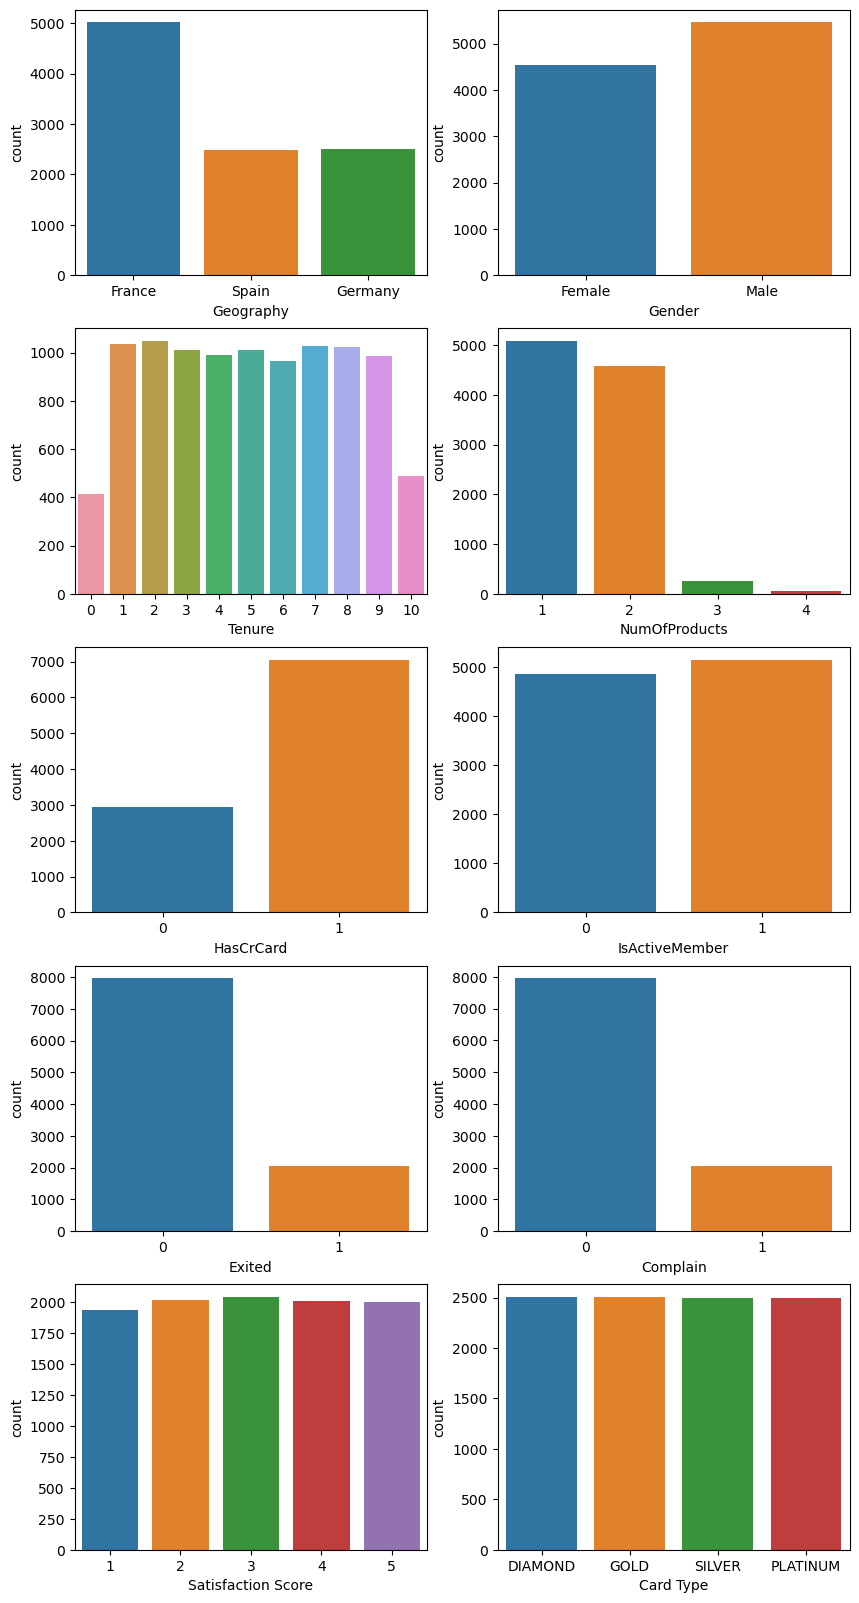

In [63]:
l=len(cat_var)+1
plt.figure(figsize=(10,20))
n=1
for i in cat_var:
    plt.subplot(l//2,2,n)
    n+=1
    sns.countplot(data=df,x=i)

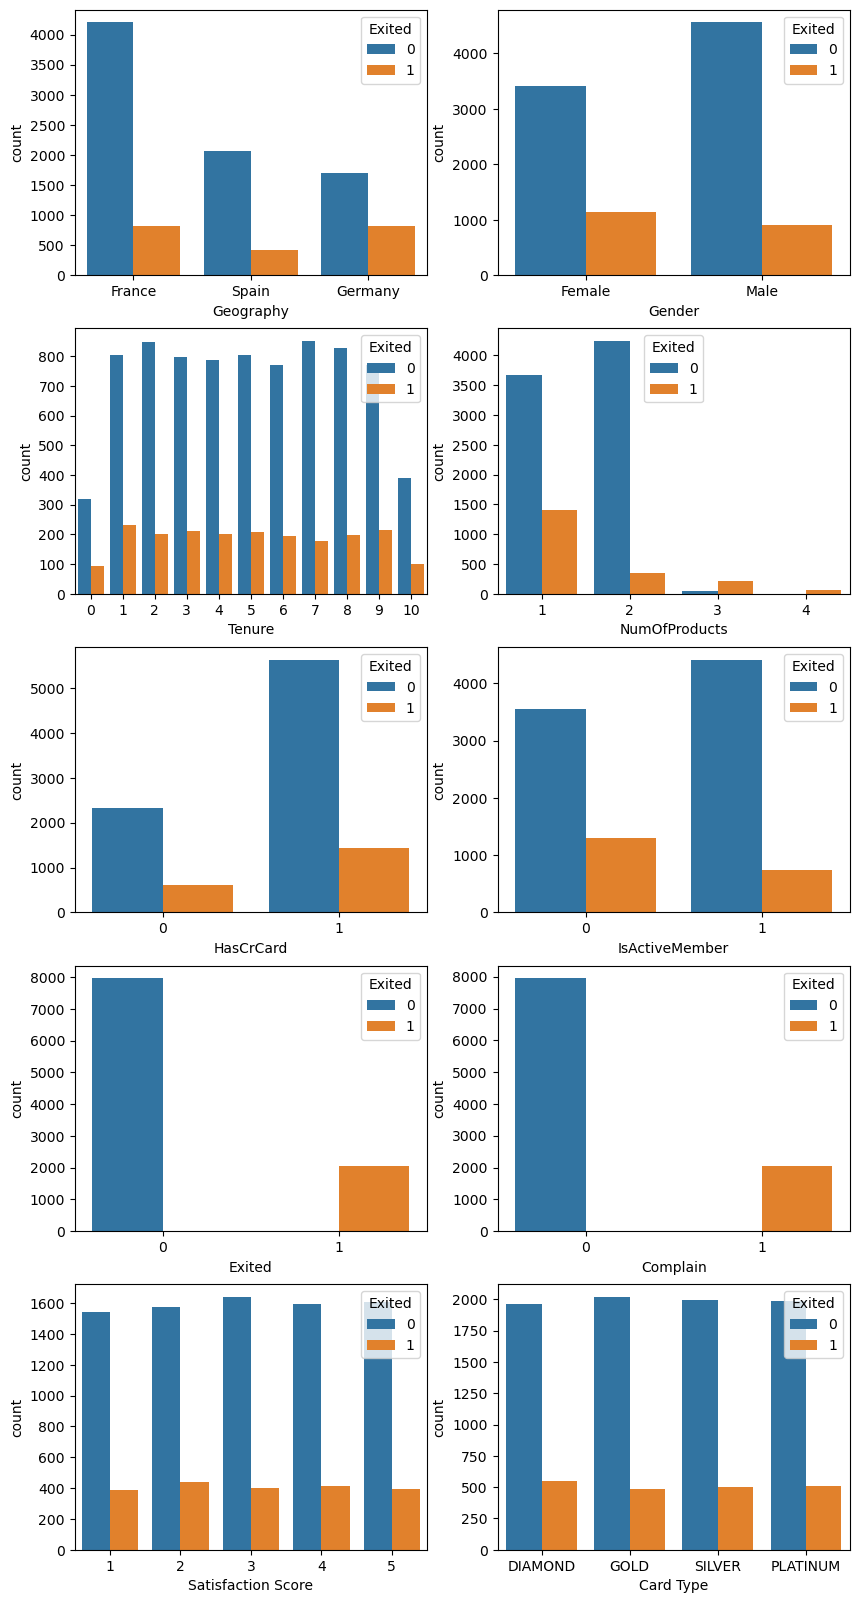

In [64]:
#to check proportion of customer who have exited based on the categorical features
l=len(cat_var)+1
plt.figure(figsize=(10,20))
n=1
for i in cat_var:
    plt.subplot(l//2,2,n)
    n+=1
    sns.countplot(data=df,x=i,hue='Exited')

#### Observations
- 1.Most of the customers are from france.
- 2.Number of Male customers is greater than number of female customers.
- 3.Most of the customers buys 1 or 2 banking products.
- 4.Most the customers have availed the credit card facility.
- 5.Exited and customers with complain are fewer when compared with total number of customers.
- 6.100% of the customers who had complaints have left the bank
- 7.The proportion of customers leaving the bank is equal across other categorical features.No significant difference in attrition percentage

In [65]:
nom_var=[]
for i in df.columns:
    if i not in cat_var:
        nom_var.append(i)
print(nom_var)

['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']


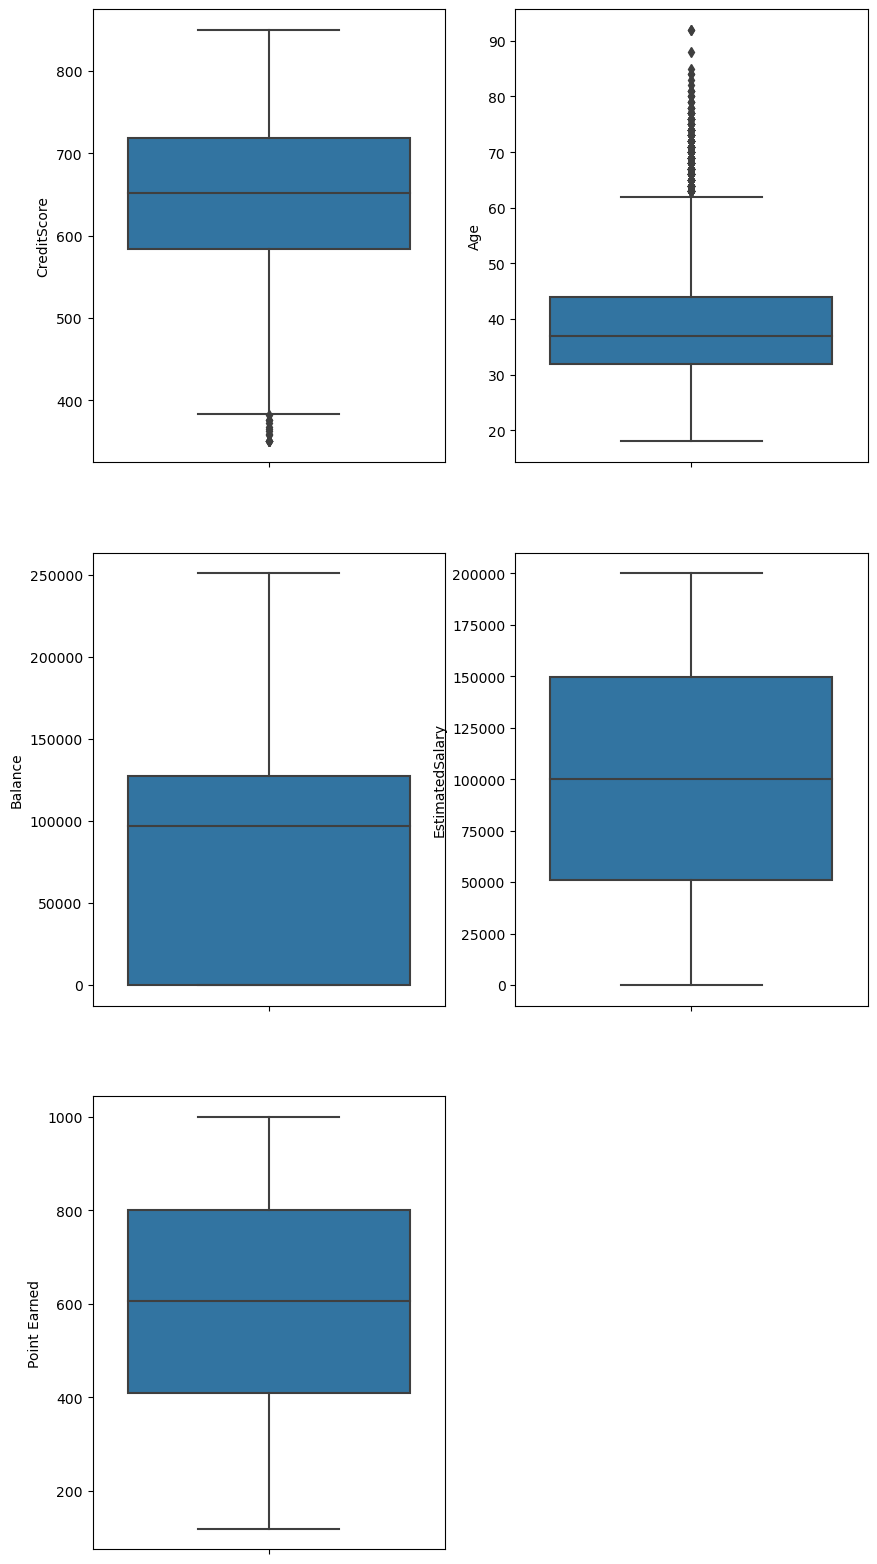

In [66]:
#To check distribution of the nominal variables.
l=len(nom_var)+1
plt.figure(figsize=(10,20))
n=1
for i in nom_var:
    plt.subplot(l//2,2,n)
    n+=1
    sns.boxplot(data=df,y=i)
#outliers in age column.
#lets treat these outliers using IQR method

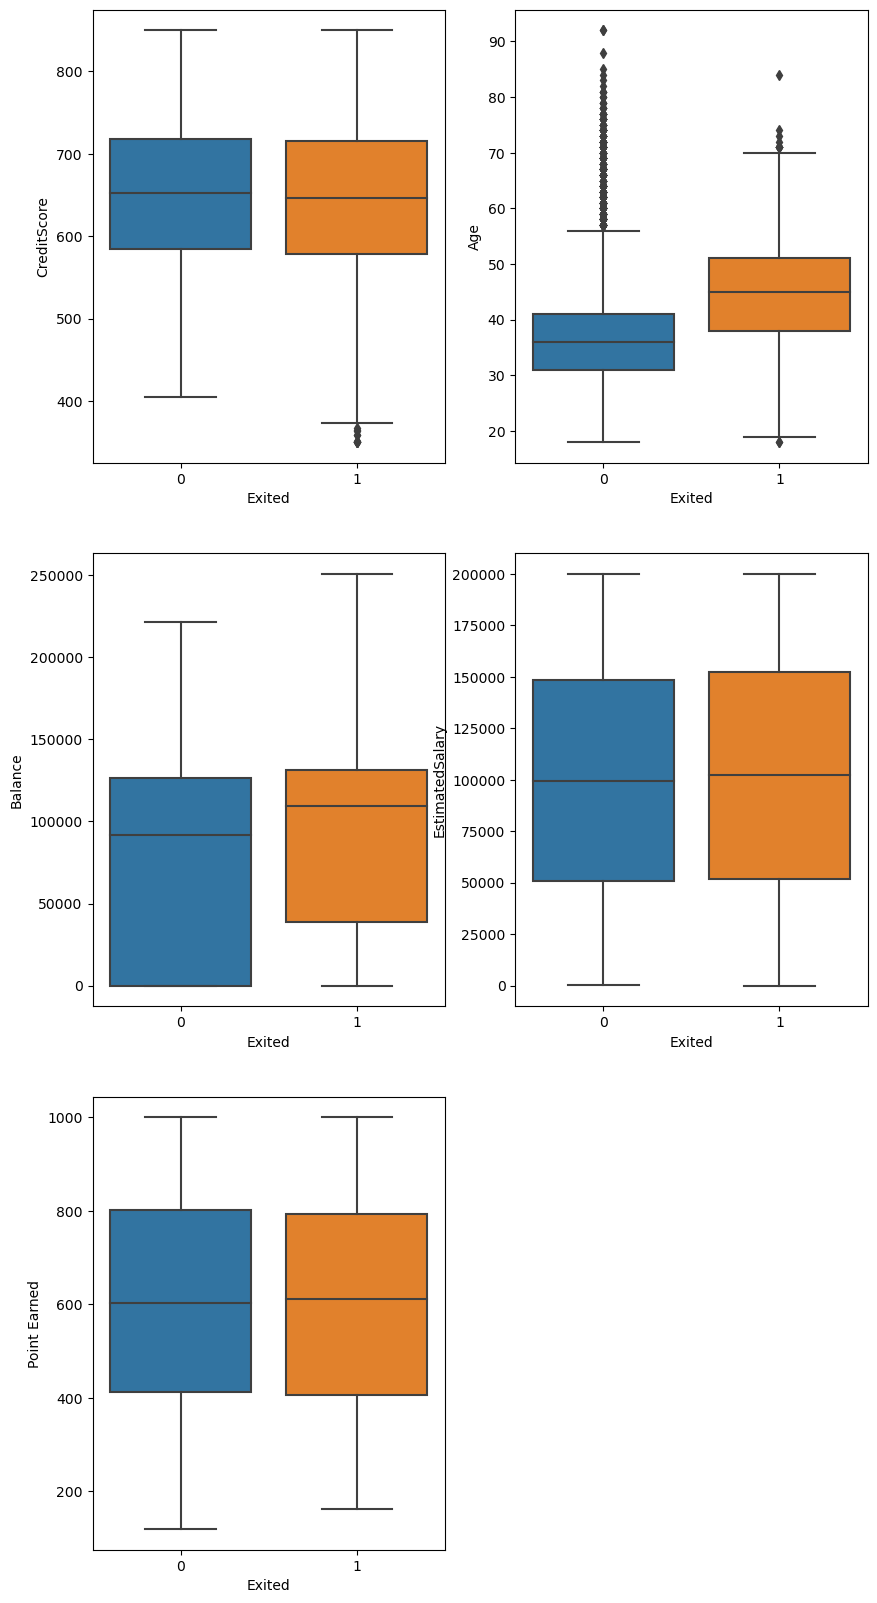

In [67]:
#To check distribution of the nominal variables.
l=len(nom_var)+1
plt.figure(figsize=(10,20))
n=1
for i in nom_var:
    plt.subplot(l//2,2,n)
    n+=1
    sns.boxplot(data=df,y=i,x='Exited')

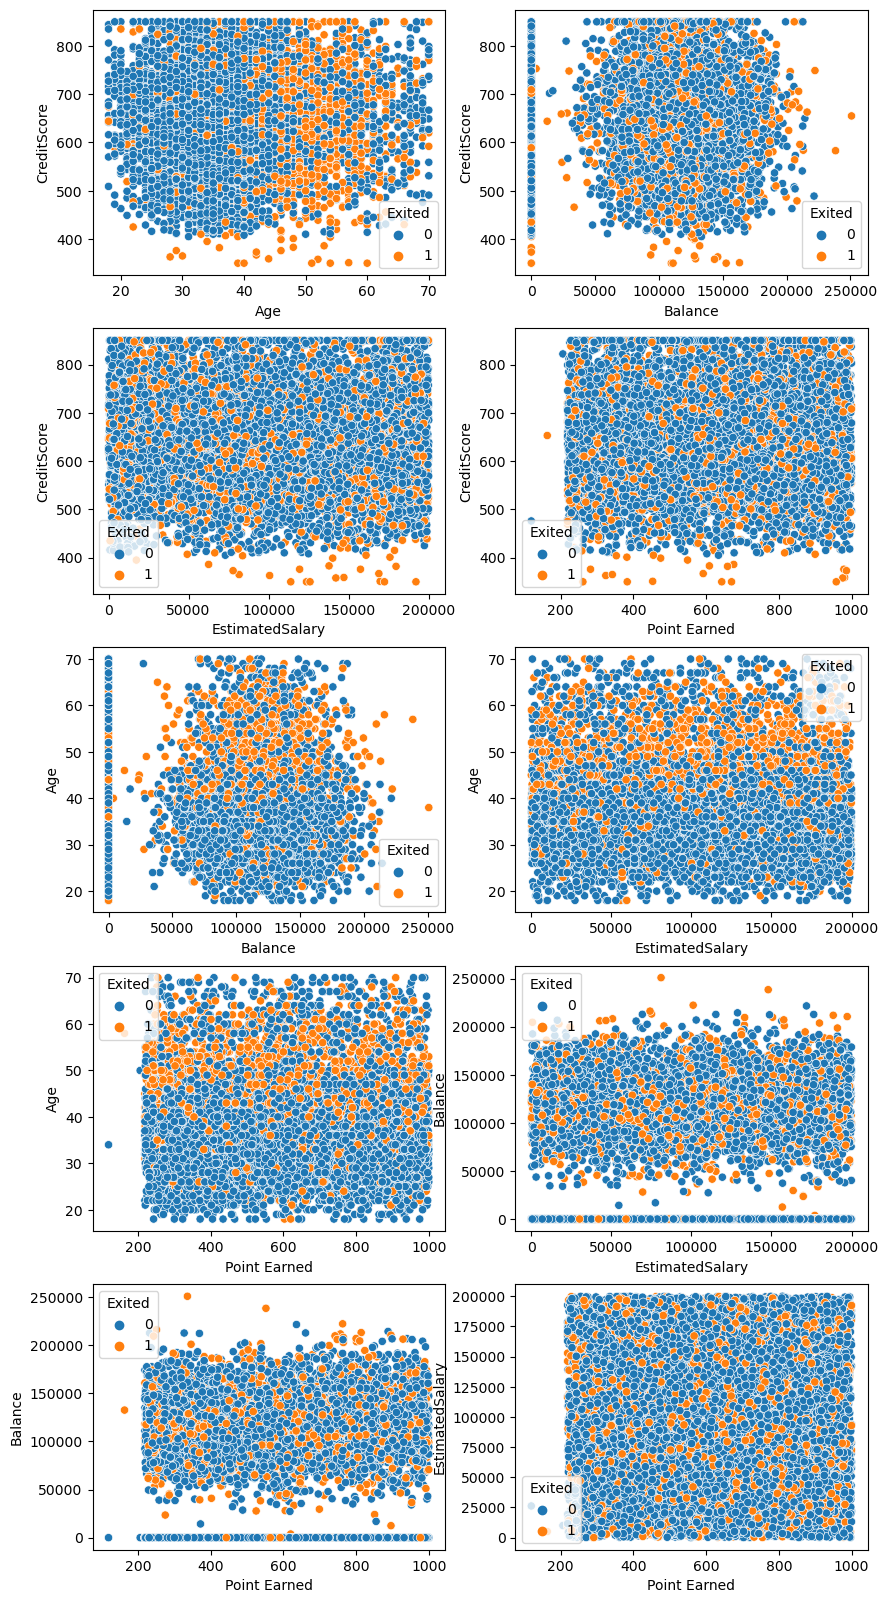

In [100]:
#Bivariant analysis between the nominal variables wrt Exited customers.
l=10
plt.figure(figsize=(10,20))
n=1
for i in range(len(nom_var)-1):
    for j in range(i+1,len(nom_var)):
        plt.subplot(l//2,2,n)
        n+=1
        sns.scatterplot(data=df,y=nom_var[i],x=nom_var[j],hue='Exited')

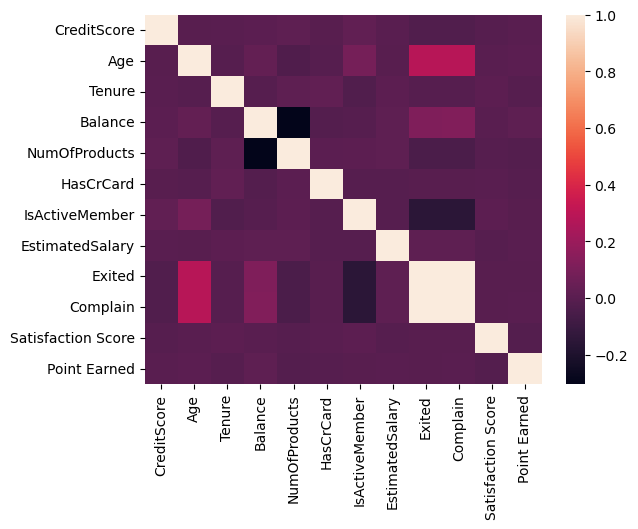

In [68]:
#to check correlation between the features
sns.heatmap(df.corr())
#Exited and complain have high correlation between them
#Lets drop ,Complain column from the dataframe
df=df.drop(columns='Complain')

### Observations:
- 1.Median Age of the exited customers is higher than the age of retained customers.Need to find the reasons for this phenomenon
- 2.Median Balance of the exited customers is higher than the retained customers.Generally the exited customers have lower balance .Need to check for reasons .
- 3.Customers older than 45 years are more prone to attrition irrespective of thier credit score,esitmated salary and points earned.

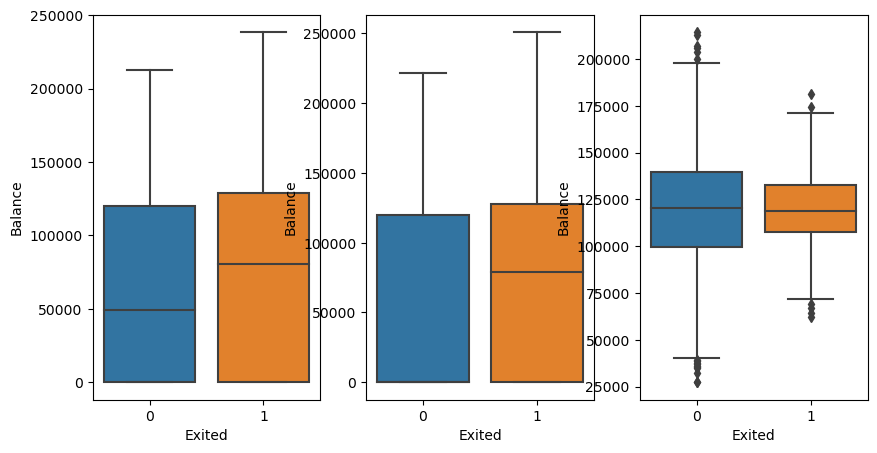

In [69]:
plt.figure(figsize=(10,5))
n=1
for i in df['Geography'].unique():
    plt.subplot(1,3,n)
    n+=1
    sns.boxplot(data=df[df['Geography']==i],y='Balance',x='Exited')
#Balance of exited customers is higher across different geographies    

## Outliers treatment

In [70]:
x=df['Age']
q3=np.percentile(x,75)
q1=np.percentile(x,25)
iqr=q3-q1
mx=q3+1.5*iqr
mn=q1-1.5*iqr
print((1-df[df['Age']<mx].shape[0]/df.shape[0])*100)
#If iqr method is applied of drop the 

4.110000000000003


In [71]:
#check number of outliers based on 3 std method.
std=np.std(x)
avg=np.mean(x)
std3=avg+3*std
print((1-df[df['Age']<std3].shape[0]/df.shape[0])*100)
#lets adopt 3 std method to drop the outliers.
#This will reduce the data loss

1.3299999999999979


In [72]:
df=df[df['Age']<std3]
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456


# Preprocessing data for classification models

In [73]:
#Doing binary encoding for the gender column
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [74]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456


In [77]:
#Lets get dummies for the columns geography and cardtype and convert them into binary one hot encoding
#since,No null values in the dataframe.While encoding ,We can drop the first columns after encoding to avoid multi collinearity
df1=pd.get_dummies(df,columns=['Geography','Card Type'],drop_first=True)
df1.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0.00,1,1,1,101348.88,1,2,464,0,0,0,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,3,456,0,1,0,0,0


In [78]:
#Lets separate independent and target variables
X=df1.drop(columns='Exited')
y=df1['Exited']

In [80]:
#Let's split these independent and target variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [81]:
#check shape of the x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(7400, 16)
(2467, 16)


In [83]:
#Lets scale the data using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Import classification Models

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [94]:
###import classification metrics.
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

## Logistic Regression Classifier

In [98]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('Accuracy score is :',100*lr.score(x_test,y_test))

Accuracy score is : 81.71868666396432


In [101]:
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
#The precision is low.This model is unable to identify the customers who can exit the relationship with bank.
#Lets use balanced class weights to balance imbalance in the data.

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1965
           1       0.65      0.22      0.33       502

    accuracy                           0.82      2467
   macro avg       0.74      0.59      0.61      2467
weighted avg       0.79      0.82      0.78      2467



<AxesSubplot:>

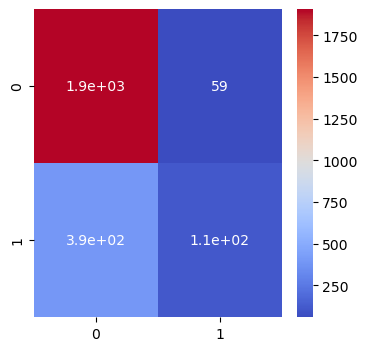

In [107]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='coolwarm',annot=True)

In [110]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#precision has decreased and recall has increased.
#The number of true positive out of total positive predicted have increased
#But on other hand the total true positive detected over all positive values is not satisfactory.

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1965
           1       0.40      0.69      0.51       502

    accuracy                           0.73      2467
   macro avg       0.65      0.71      0.66      2467
weighted avg       0.80      0.73      0.75      2467

[[1451  514]
 [ 156  346]]


In [112]:
lr=LogisticRegression(class_weight='balanced_subsample')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#precision have significantly increased.Now we are able to find the customers who can leave the bank.This will help us to prevent churning of customers.

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1965
           1       0.65      0.22      0.33       502

    accuracy                           0.82      2467
   macro avg       0.74      0.59      0.61      2467
weighted avg       0.79      0.82      0.78      2467

[[1906   59]
 [ 392  110]]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='Precision', ylabel='Recall'>

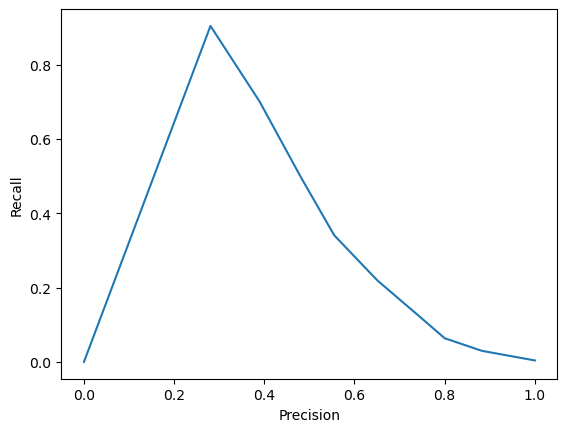

In [135]:
#Let's check performance of the logistic regression model for different thresholds.
from sklearn.metrics import precision_score,recall_score
p=[]
r=[]
for threshold in list(np.linspace(0.1,1,10)):
    l=y_test.shape[0]
    y_prob=lr.predict_proba(x_test)
    y_prob=y_prob.T
    y_prob=y_prob[1]
    y_prob[y_prob>threshold]=1
    y_prob[y_prob<threshold]=0
    precision=precision_score(y_test,y_prob)
    recall=recall_score(y_test,y_prob)
    p.append(precision)
    r.append(recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
sns.lineplot(x=p,y=r)  
    

In [145]:
#use smote method to train the model to reduce influence of data imbalance
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (11750, 16)
After OverSampling, the shape of train_y: (11750,) 

After OverSampling, counts of label '1': 5875
After OverSampling, counts of label '0': 5875


In [147]:
#lets fit this into logistic regression model
lr.fit(X_train_res, y_train_res)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
#their is no improvement of precision and recall score even after smote.
#Lets apply other classification algorithms

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1965
           1       0.41      0.68      0.51       502

    accuracy                           0.73      2467
   macro avg       0.65      0.71      0.66      2467
weighted avg       0.80      0.73      0.75      2467



## Decision Tree algorithm

In [149]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))
##Decision Tree classifier is able to recognise only 50% of the exited customers.
##lets tune the hyper parameters like maximum depth and look at the performance of the decision tree classifier

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1965
           1       0.50      0.53      0.51       502

    accuracy                           0.80      2467
   macro avg       0.69      0.70      0.69      2467
weighted avg       0.80      0.80      0.80      2467



- lets try using oversampled data

In [151]:
dt.fit(X_train_res, y_train_res)
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))
#No much improvement in the precison score.The model is unable to predict the customers who can leave the bank.precision is very less for '1'

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1965
           1       0.43      0.55      0.48       502

    accuracy                           0.76      2467
   macro avg       0.65      0.68      0.66      2467
weighted avg       0.79      0.76      0.77      2467



<AxesSubplot:>

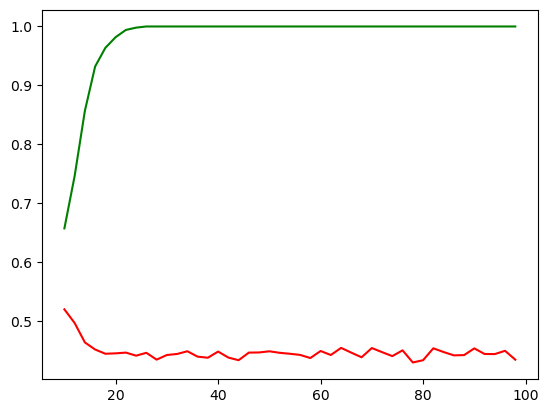

In [152]:
#lets check performance for different max_depth
#To check overfitting and underfitting scenario
from sklearn.metrics import precision_score,recall_score
p_train=[]
p_test=[]
for depth in range(10,100,2):
    dt=DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_res, y_train_res)
    y_pred=dt.predict(x_train)
    p_train.append(precision_score(y_train,y_pred))
    y_pred=dt.predict(x_test)
    p_test.append(precision_score(y_test,y_pred))
sns.lineplot(x=range(10,100,2),y=p_train,color='green')
sns.lineplot(x=range(10,100,2),y=p_test,color='red')
#The model is facing the overfitting problem.
#Let's try to random forest classifiers to overcome these drawbacks
    

In [153]:
#To visualise the decision tree..
from sklearn.tree import plot_tree

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

plot_tree(dt);
#fig.savefig('../images/plottreedefault.png')

# Random Forest Classifier

In [161]:
rf=RandomForestClassifier()
cv_rf=GridSearchCV(rf,param_grid={'max_depth':[10,20,30,40,50],'n_estimators':[40,50,60,70,80]},cv=5)
cv_rf.fit(X_train_res,y_train_res)
cv_rf.best_estimator_

RandomForestClassifier(max_depth=40, n_estimators=60)

In [164]:
rf=RandomForestClassifier(max_depth=40, n_estimators=60)
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=40, n_estimators=60)

In [167]:
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
##precision and recall score have increased a lot after random forest algorithm.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1965
           1       0.63      0.57      0.60       502

    accuracy                           0.84      2467
   macro avg       0.76      0.74      0.75      2467
weighted avg       0.84      0.84      0.84      2467



In [171]:
print(confusion_matrix(y_test,y_pred))
print('Precision score is :',precision_score(y_test,y_pred))

[[1797  168]
 [ 218  284]]
Precision score is : 0.6283185840707964


# Recommendations:
- 1.Customers with complaints are more prone to churn.Focus on resolving the complaints to reduce churning of customers.
- 2.Most of the customers are from the france.There is more chance of expansion in france region.
- 3.Customers who are older than 45 years are more prone to churn.Try to identify the reasons for this.Need more data to arrive at conclusion.
- 4.Customers with higher median balance are leaving the bank.Need to do deeper analysis to find out the reasons for this trend.